In [227]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [228]:
import os
from os.path import basename
import spacy as spacy
import nltk
import matplotlib.pyplot as plt
from collections import Counter

In [229]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/marinkavette/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [230]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marinkavette/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [231]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [232]:
from nltk.stem import PorterStemmer, LancasterStemmer

In [233]:
from nltk.stem import WordNetLemmatizer

In [234]:
os.getcwd()

'/Users/marinkavette/analyzing data/Assignment1/Part_I_1-2'

**PART 1 AND 2**

In [235]:
path = "/Users/marinkavette/analyzing data/Assignment1/Part_I_1-2"

In [236]:
def clean_text(text):
    """Remove punctuation, extra spaces, and convert text to lowercase."""
    text = text.lower()  
    punctuation = '!@#$%^&*()_-+={}[]:;"\'|<>,.?/~`'
    return ''.join(character for character in text
                   if character not in punctuation)

In [237]:
word_frequency = {}
word_frequency_total = {}

os.chdir(path)

for filename in os.listdir(path):
    if filename.endswith(".txt"):
        file_path = os.path.join(path, filename)

        with open(file_path, "r", encoding="utf-8") as file:
          fulltext = file.read()
          text = clean_text(fulltext)

        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        word_counter = Counter(words)
        word_frequency[filename] = word_counter
        word_frequency_total.update(word_counter)

In [238]:
word_frequency

{'01.txt': Counter({'the': 17,
          'her': 12,
          'river': 11,
          'missy': 10,
          'a': 10,
          'and': 9,
          'to': 8,
          'was': 7,
          'on': 7,
          'it': 6,
          '“': 6,
          '”': 6,
          'maps': 5,
          'she': 5,
          'at': 5,
          '’': 5,
          'that': 4,
          'over': 4,
          's': 4,
          'sitting': 3,
          'chair': 3,
          'had': 3,
          'placing': 3,
          'in': 2,
          'house': 2,
          'map': 2,
          'out': 2,
          'of': 2,
          'people': 2,
          'own': 2,
          'this': 2,
          'looked': 2,
          'smiled': 2,
          'still': 2,
          'place': 2,
          'smiles': 2,
          'leans': 2,
          'kiss': 2,
          'smile': 2,
          'table': 2,
          'cup': 2,
          'coffee': 2,
          'or': 2,
          'little': 2,
          'turned': 2,
          'another': 1,
          'plot': 1,
     

In [239]:
word_frequency_total

{'another': 4,
 'plot': 1,
 'bonesbard': 1,
 'missy': 10,
 'was': 39,
 'sitting': 1,
 'on': 22,
 'a': 78,
 'chair': 3,
 'in': 45,
 'house': 1,
 'maps': 5,
 'and': 84,
 'papers': 1,
 'spread': 1,
 'around': 8,
 'normally': 1,
 'her': 80,
 'planning': 1,
 'mental': 1,
 'but': 23,
 'river': 3,
 'had': 9,
 'suggested': 1,
 'physical': 1,
 'map': 2,
 'to': 112,
 'refer': 1,
 'it': 50,
 'helpful': 1,
 'walked': 1,
 'out': 26,
 'of': 52,
 'the': 133,
 'bedroom': 1,
 '“': 89,
 'people': 1,
 'who': 3,
 'own': 2,
 'this': 10,
 'really': 8,
 'have': 16,
 'no': 11,
 'good': 7,
 'clothes': 1,
 '”': 89,
 'she': 82,
 'wearing': 1,
 'tshirt': 1,
 'that': 43,
 'drenched': 1,
 'form': 1,
 'some': 4,
 'trousers': 1,
 'looked': 5,
 'about': 11,
 'right': 9,
 'size': 1,
 'smiled': 1,
 'still': 3,
 'mary': 1,
 'poppins': 1,
 'looking': 1,
 'outfit': 1,
 'over': 5,
 'at': 30,
 'darling': 1,
 'wouldn': 1,
 '’': 109,
 't': 52,
 'be': 16,
 'better': 4,
 'start': 1,
 'there': 10,
 'pointed': 2,
 'place': 1,
 's'

In [240]:
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

#plot function for barplot 25 most common words
def plot_top_words(word_counter, title):
    word_counter = Counter(word_counter)
    most_common_words = word_counter.most_common(25) 
    words, counts = zip(*most_common_words)
    
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='hotpink')
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

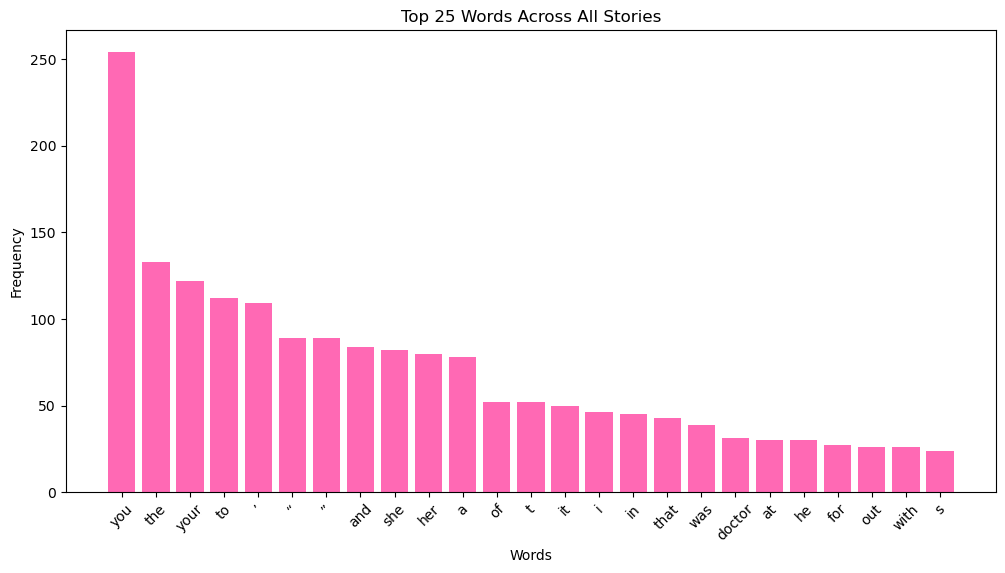

In [241]:
plot_top_words(word_frequency_total, "Top 25 Words Across All Stories")

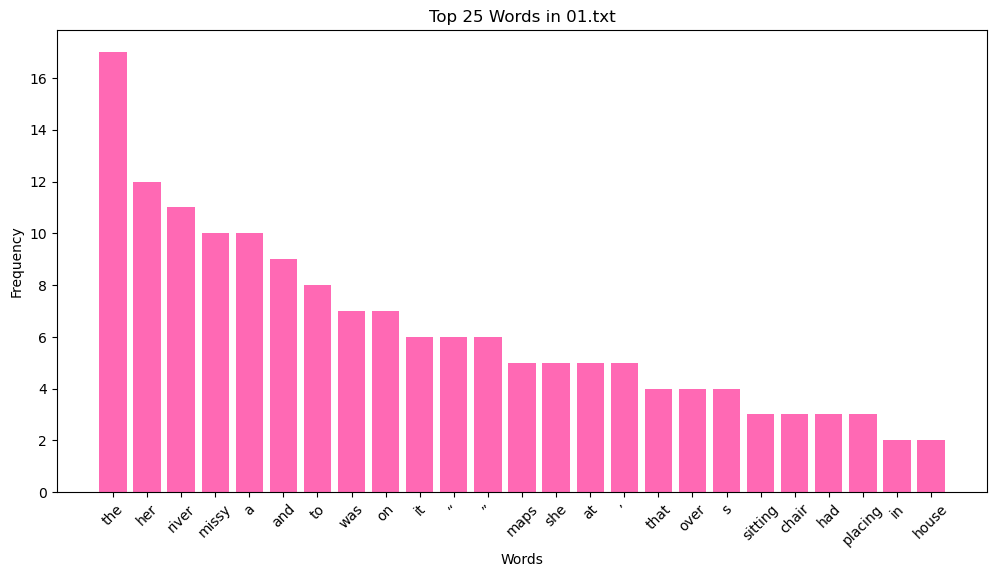

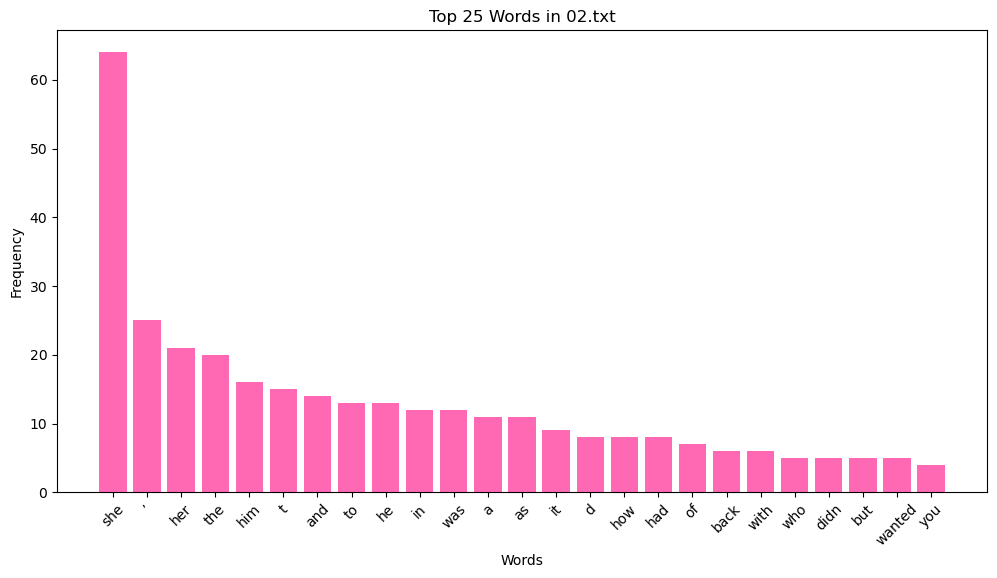

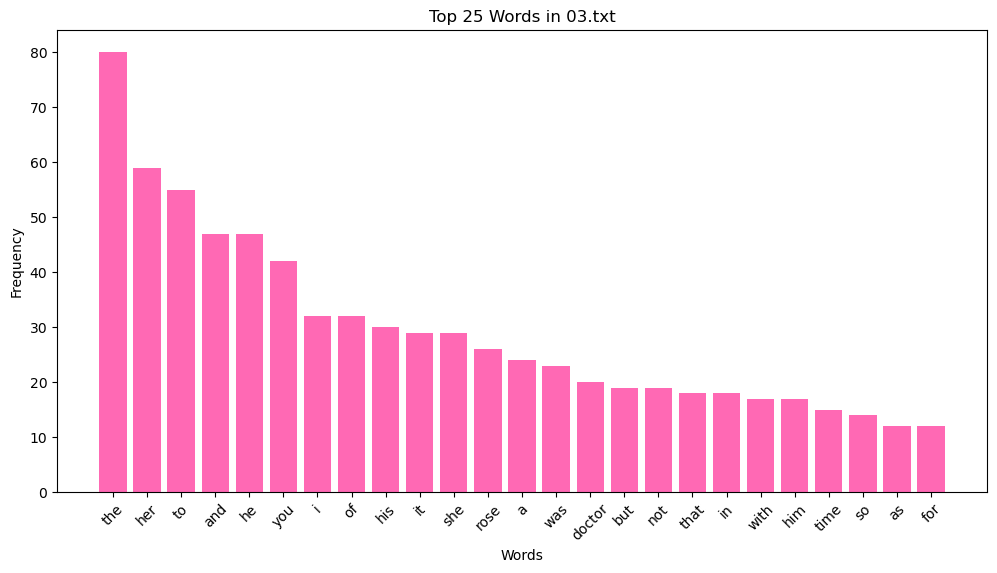

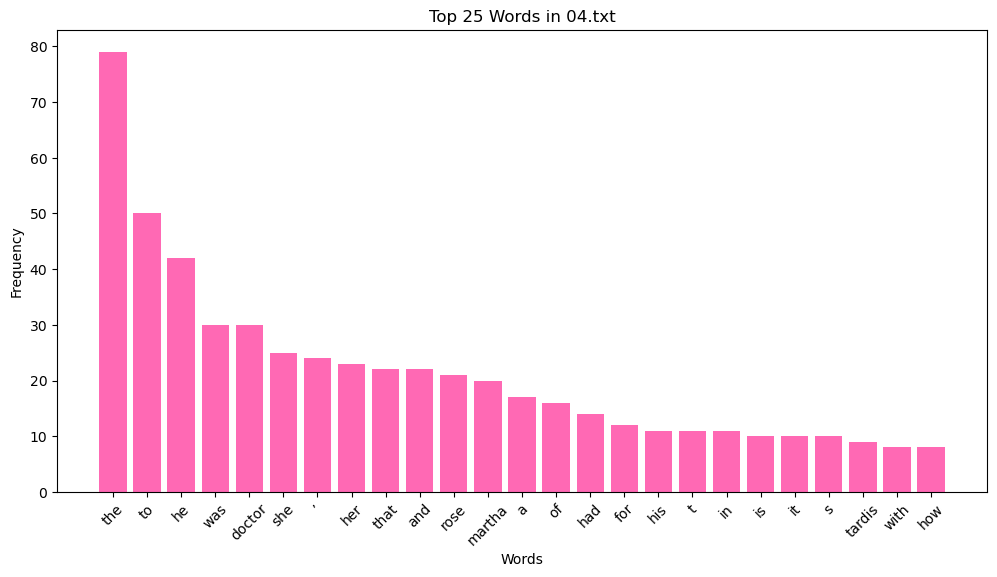

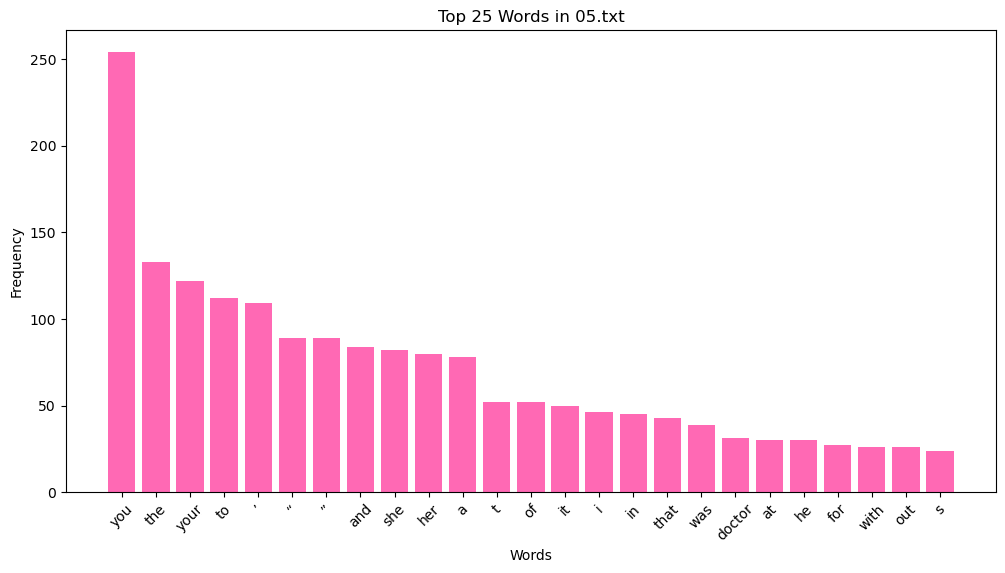

In [242]:
#plot for top 25 words per story
for story, counter in word_frequency.items():
    plot_top_words(counter, f"Top 25 Words in {story}")

**PORTER**

In [243]:
porter = PorterStemmer()

porter_word_frequency = {}
porter_word_freq_total = Counter()

os.chdir(path)

for filename in os.listdir(path):
    if filename.endswith(".txt"):
        file_path = os.path.join(path, filename)

        with open(file_path, "r", encoding="utf-8") as file:
          fulltext = file.read()
          text = clean_text(fulltext)

        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        stemmed_words = [porter.stem(word) for word in words]
        word_counter = Counter(stemmed_words)
        porter_word_frequency [filename] = word_counter
        porter_word_freq_total.update(word_counter)

In [244]:
path = "/Users/marinkavette/analyzing data/Assignment1/Part_I_1-2"

In [245]:
porter_word_frequency

{'01.txt': Counter({'the': 17,
          'her': 12,
          'river': 11,
          'missi': 10,
          'a': 10,
          'and': 9,
          'to': 8,
          'wa': 7,
          'on': 7,
          'map': 7,
          'it': 6,
          '“': 6,
          '”': 6,
          'smile': 6,
          'she': 5,
          'look': 5,
          'at': 5,
          '’': 5,
          'place': 5,
          'that': 4,
          'over': 4,
          's': 4,
          'sit': 3,
          'chair': 3,
          'had': 3,
          'cup': 3,
          'in': 2,
          'hous': 2,
          'normal': 2,
          'out': 2,
          'of': 2,
          'peopl': 2,
          'own': 2,
          'thi': 2,
          'still': 2,
          'point': 2,
          'lean': 2,
          'kiss': 2,
          'tabl': 2,
          'coffe': 2,
          'bit': 2,
          'or': 2,
          'littl': 2,
          'turn': 2,
          'anoth': 1,
          'plot': 1,
          'bonesbard': 1,
          'paper': 1,
 

In [246]:
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

# Function to plot the top 25 stemmed words
def plot_top_words_porter(word_counter, title):
    word_counter = Counter(word_counter)  
    most_common_words = word_counter.most_common(25)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='mediumslateblue')
    plt.title(title)
    plt.xlabel("Stemmed Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


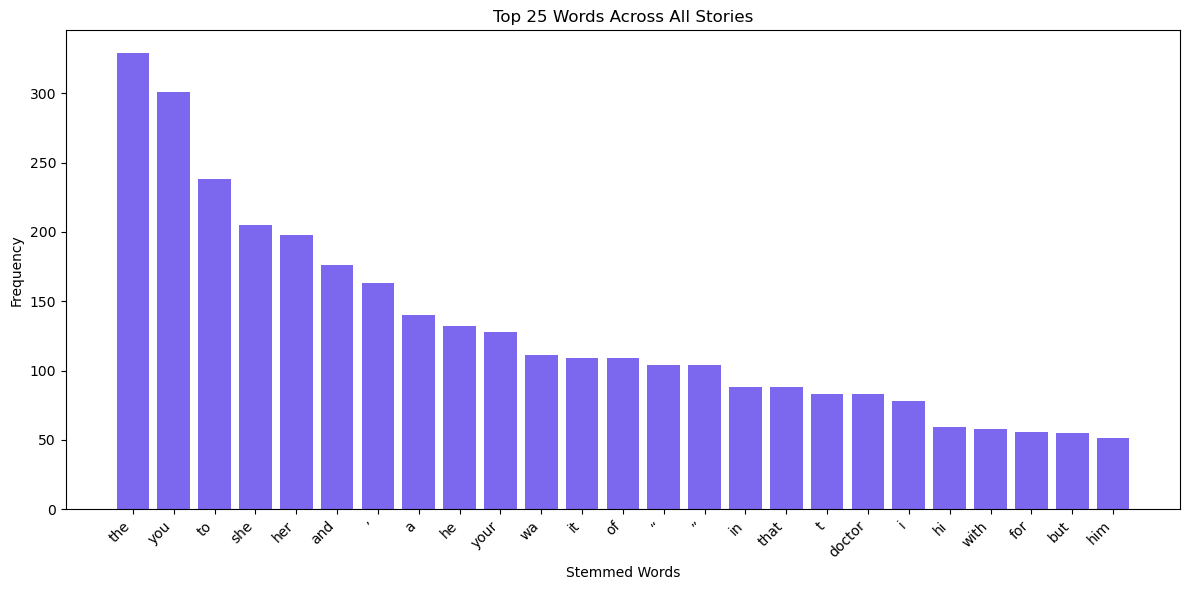

In [247]:
plot_top_words_porter(porter_word_freq_total, "Top 25 Words Across All Stories")

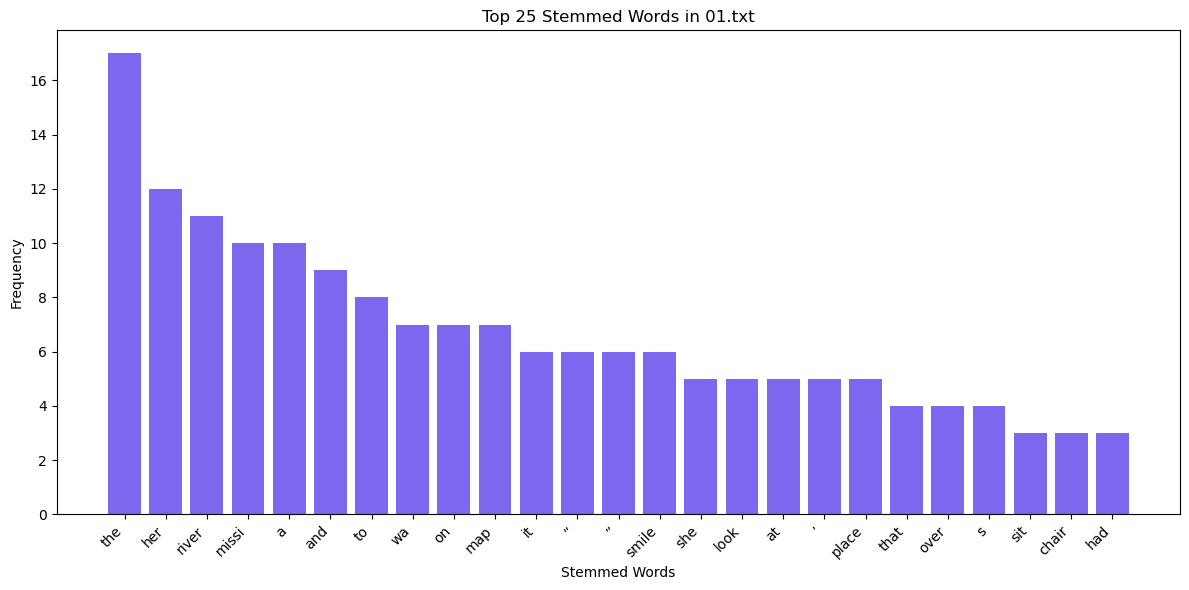

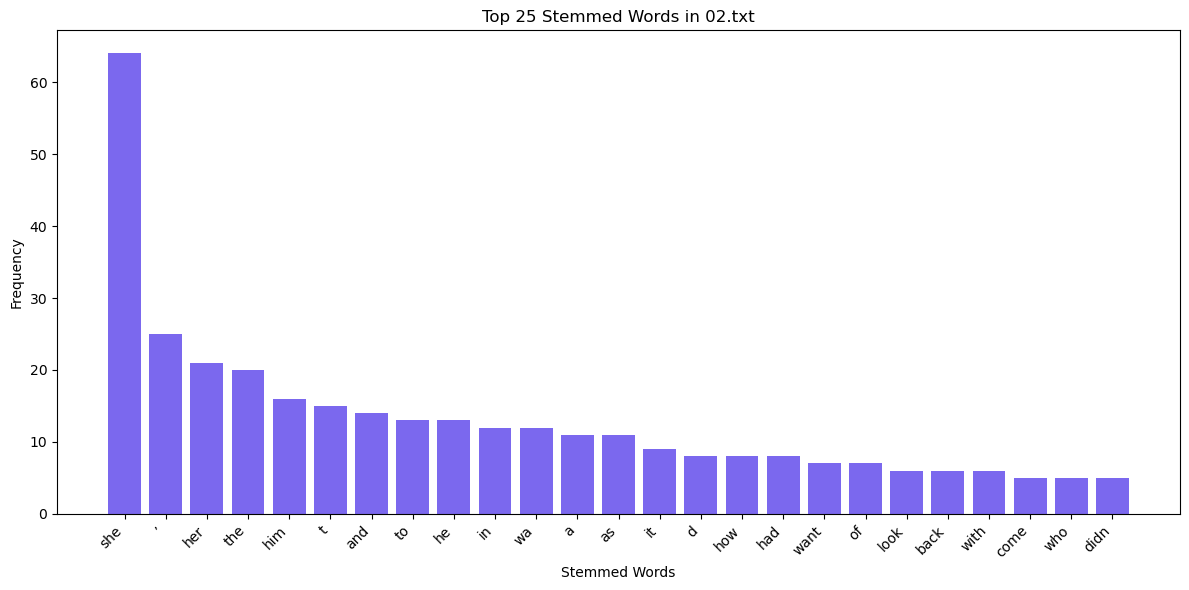

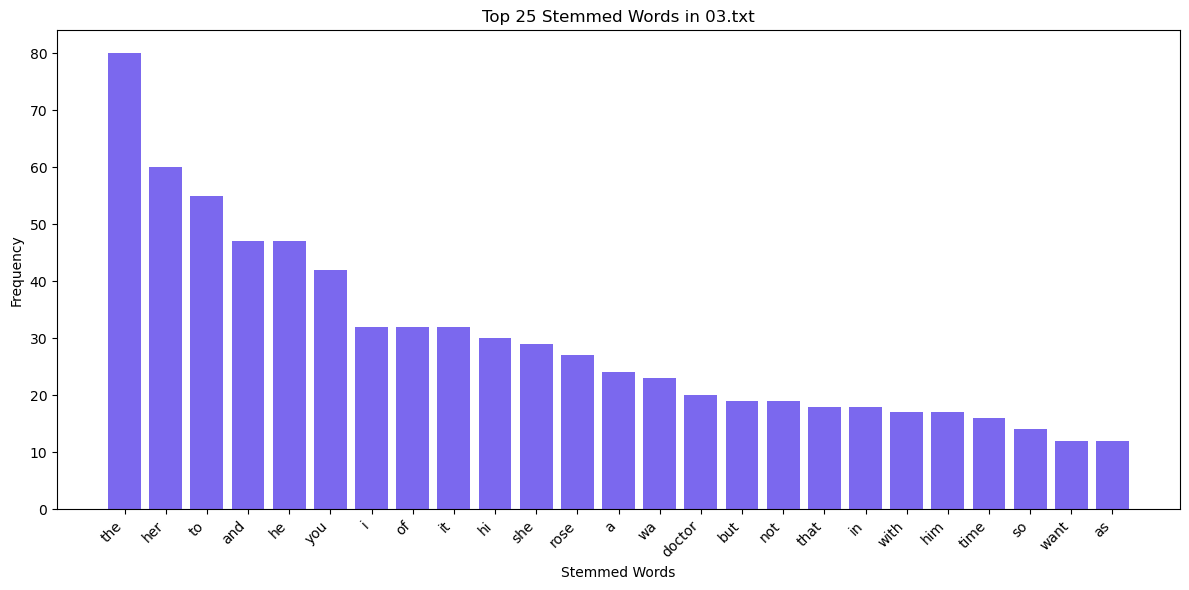

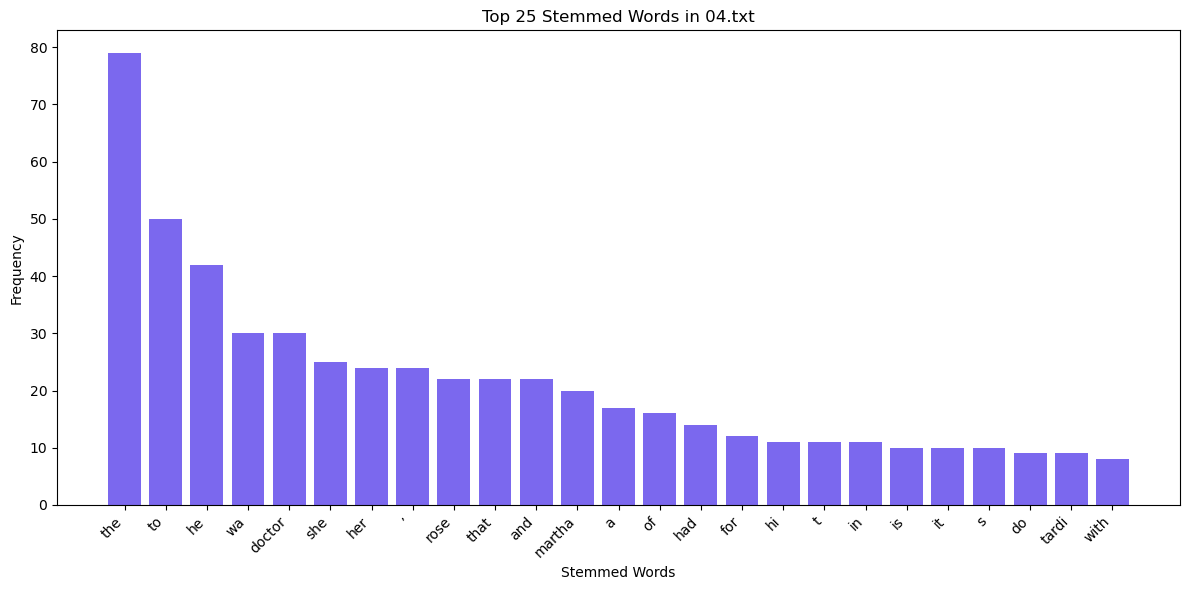

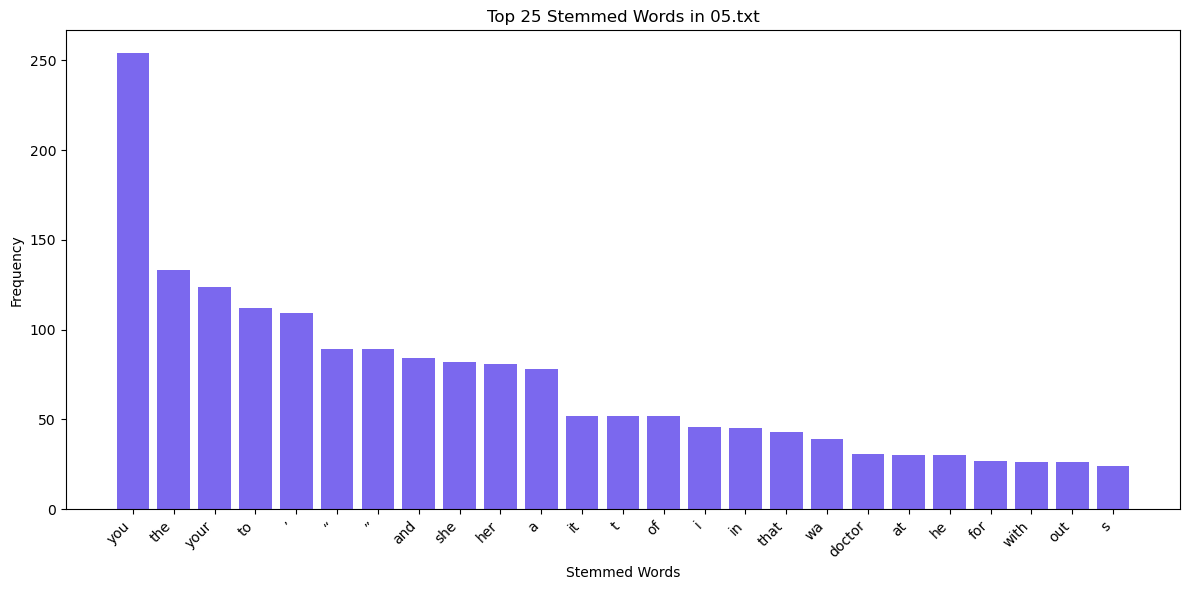

In [248]:
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

# Function to plot the top 25 stemmed words per story
def plot_top_words_porter(word_counter, title):
    word_counter = Counter(word_counter)
    most_common_words = word_counter.most_common(25)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='mediumslateblue')
    plt.title(title)
    plt.xlabel("Stemmed Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for filename, counts in porter_word_frequency.items():
    plot_top_words_porter(counts, f"Top 25 Stemmed Words in {filename}")

**LANCASTER**

In [249]:
lancaster = LancasterStemmer()

lancaster_word_frequency = {}
lancaster_word_freq_total = Counter()

os.chdir(path)

for filename in os.listdir(path):
    if filename.endswith(".txt"):
        file_path = os.path.join(path, filename)

        with open(file_path, "r", encoding="utf-8") as file:
          fulltext = file.read()
          text = clean_text(fulltext)

        sentences = sent_tokenize(text)
        words = word_tokenize(text)
        lancaster_stems = [lancaster.stem(word) for word in words] 
        word_counter = Counter(lancaster_stems)
        lancaster_word_frequency[filename] = word_counter
        lancaster_word_freq_total.update(word_counter)

In [250]:
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

# Function to plot the top 25 stemmed Lancster words
def plot_top_words_lan(word_counter, title):
    word_counter = Counter(word_counter)  
    most_common_words = word_counter.most_common(25) 
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='violet')
    plt.title(title) 
    plt.xlabel("Lancaster Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


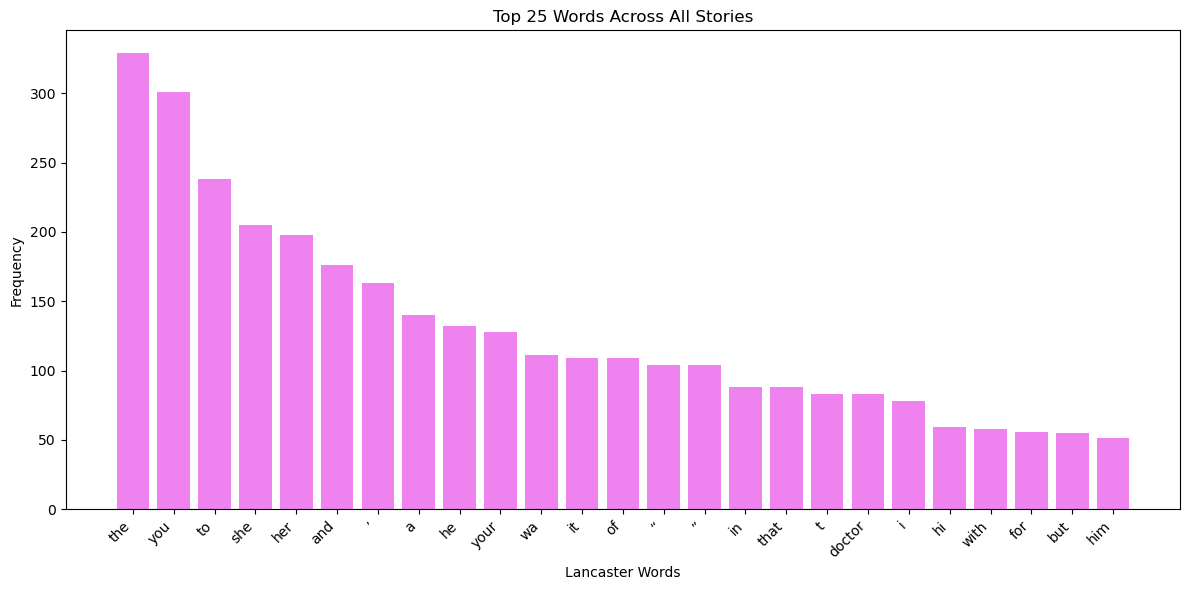

In [251]:
plot_top_words_lan(porter_word_freq_total, "Top 25 Words Across All Stories")

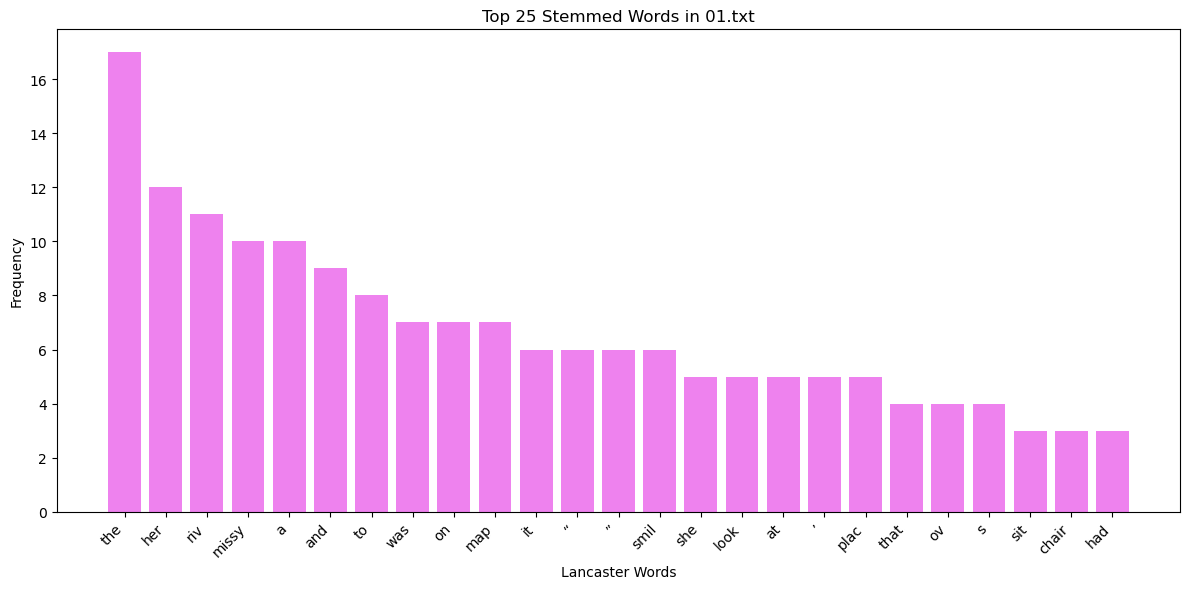

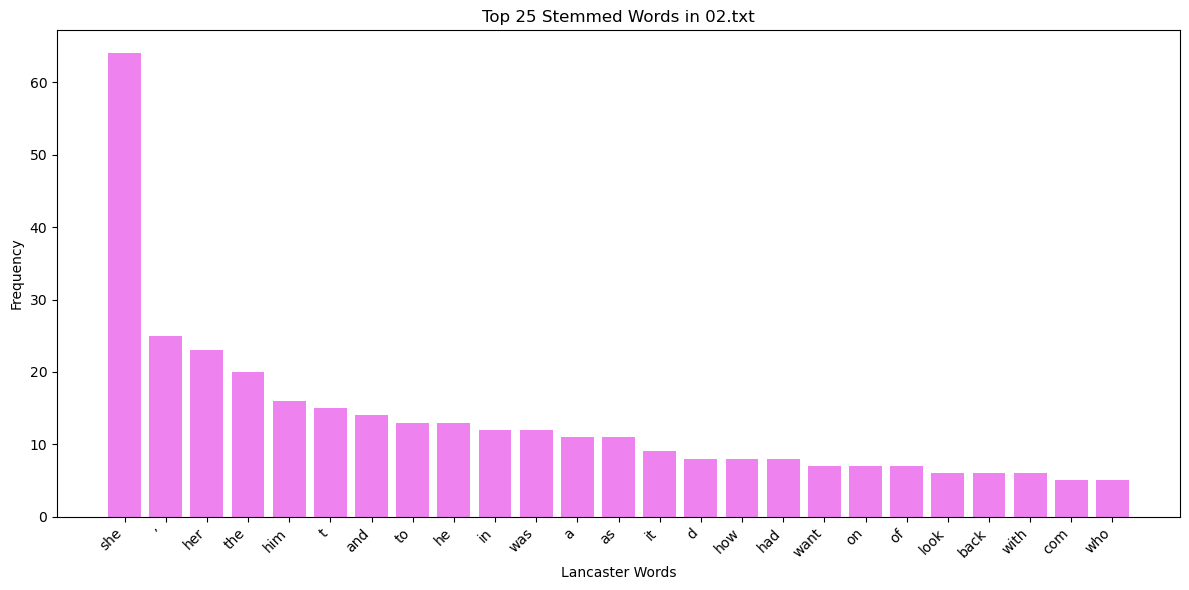

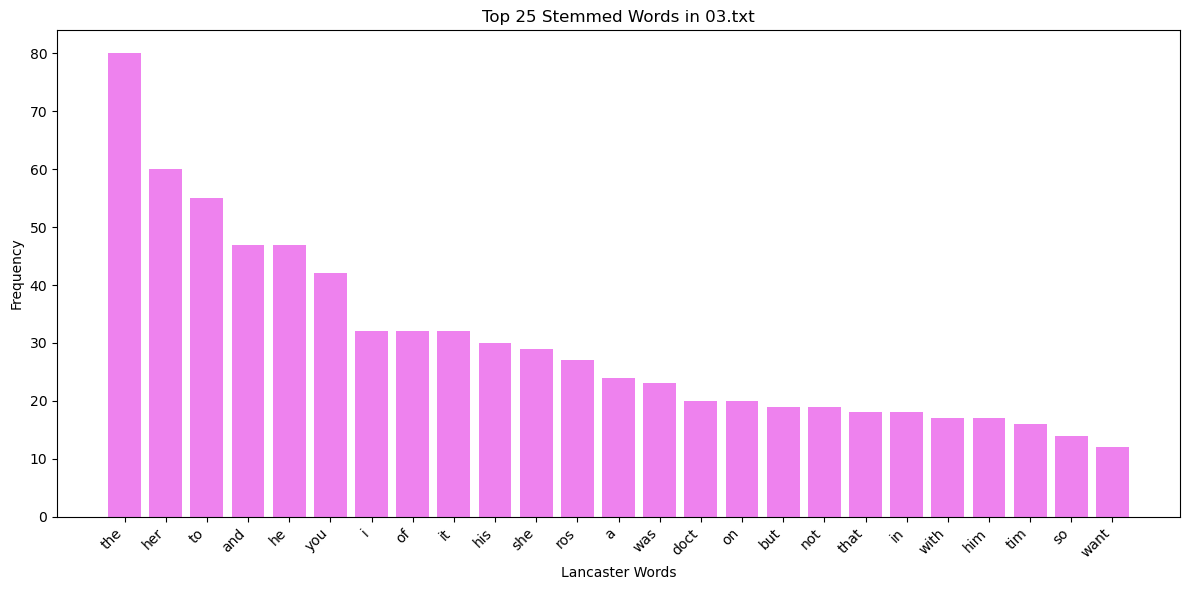

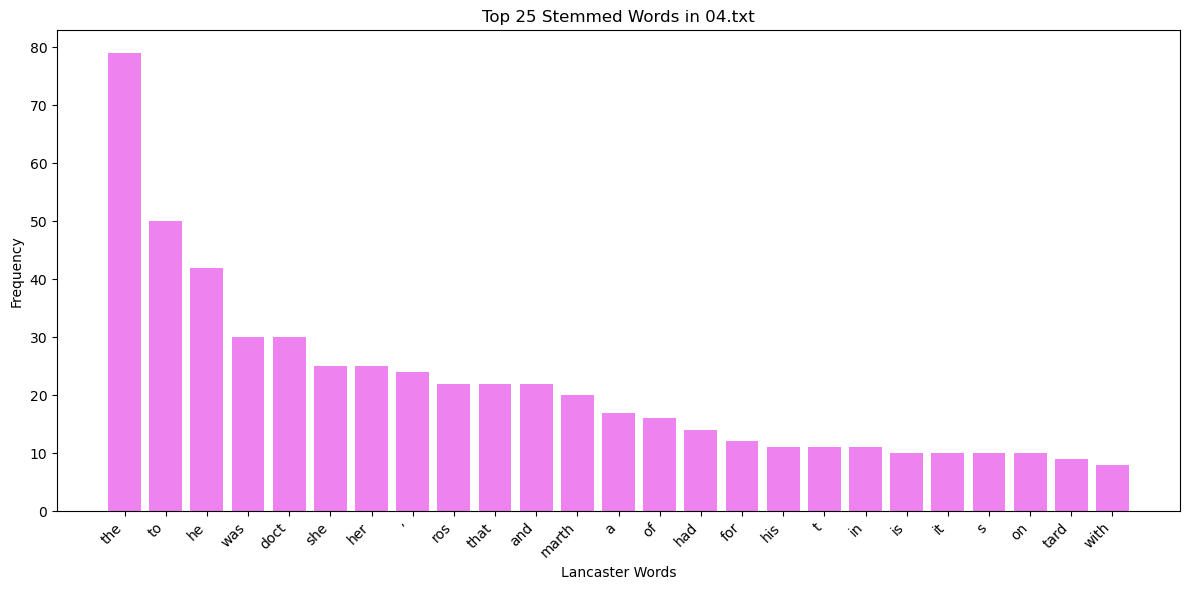

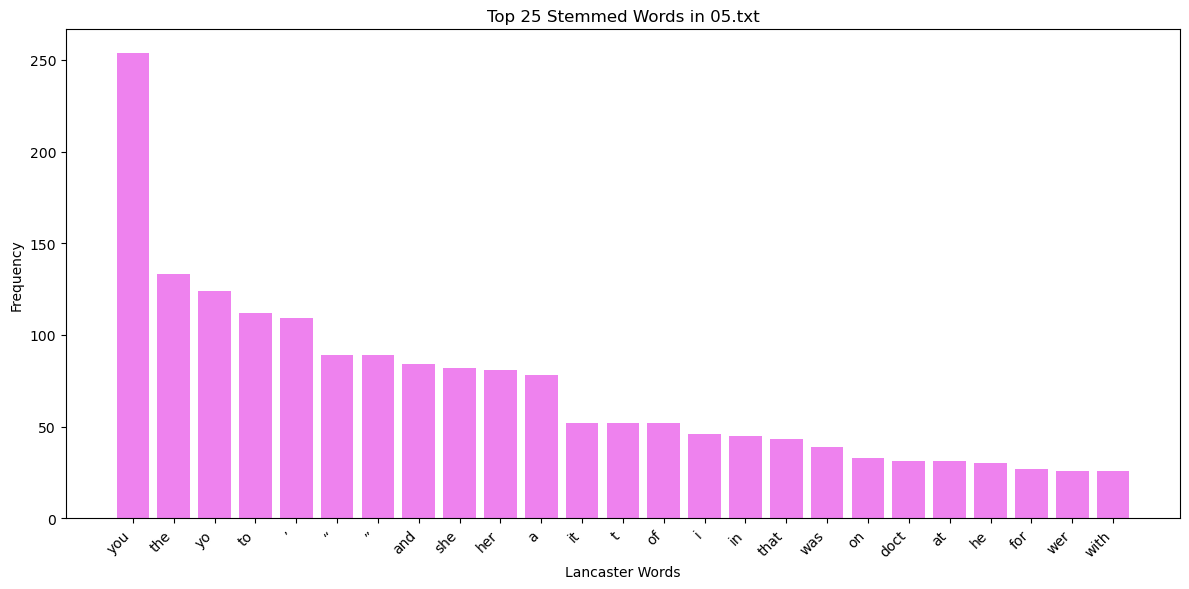

In [252]:
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

# Function to plot the top 25 stemmed Lancaster words per story
def plot_top_words_lan(word_counter, title):
    word_counter = Counter(word_counter)  
    most_common_words = word_counter.most_common(25)  
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color='violet')
    plt.title(title)  
    plt.xlabel("Lancaster Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
for filename, counts in lancaster_word_frequency.items():
    plot_top_words_lan(counts, f"Top 25 Stemmed Words in {filename}")

**PART 3**

In [254]:
import spacy
from spacy import displacy
from collections import Counter

In [255]:
path1 = "/Users/marinkavette/analyzing data/Assignment1/Part_I_3/"

In [256]:
def read_file(file_path):
    with open(file_path, encoding = "utf8") as infile:
        contents = infile.read()
    return contents

In [257]:
import os

# Original File Paths
file_path_english = "/Users/marinkavette/analyzing data/Assignment1/Part_I_3/pg74.txt"  # English
file_path_dutch = "/Users/marinkavette/analyzing data/Assignment1/Part_I_3/pg18381.txt"  # Dutch
file_path_german = "/Users/marinkavette/analyzing data/Assignment1/Part_I_3/pg30165.txt"  # German

# Clean English File
with open(file_path_english, "r", encoding="utf-8") as file:
    text_english = file.read()
cleaned_text_english = text_english.replace('\ufeff', ' ').replace('\n', ' ').strip()

# Clean Dutch File
with open(file_path_dutch, "r", encoding="utf-8") as file:
    text_dutch = file.read()
cleaned_text_dutch = text_dutch.replace('\ufeff', ' ').replace('\n', ' ').strip()

# Clean German File
with open(file_path_german, "r", encoding="utf-8") as file:
    text_german = file.read()
cleaned_text_german = text_german.replace('\ufeff', ' ').replace('\n', ' ').strip()


In [314]:
import spacy


en_nlp = spacy.load('en_core_web_sm')
nl_nlp = spacy.load('nl_core_news_sm')
de_nlp = spacy.load('de_core_news_sm')


In [259]:
#tokenize the doc 
en_doc = en_nlp(cleaned_text_english)

for token in en_doc:
    print(token, "-", token.pos_)

CHAPTER - PROPN
I - PRON
   - SPACE
“ - PUNCT
Tom - PROPN
! - PUNCT
” - PUNCT
  - SPACE
No - DET
answer - NOUN
. - PUNCT
  - SPACE
“ - PUNCT
TOM - PROPN
! - PUNCT
” - PUNCT
  - SPACE
No - DET
answer - NOUN
. - PUNCT
  - SPACE
“ - PUNCT
What - PRON
’s - AUX
gone - VERB
with - ADP
that - DET
boy - NOUN
, - PUNCT
I - PRON
wonder - VERB
? - PUNCT
You - PRON
TOM - X
! - PUNCT
” - PUNCT
  - SPACE
No - DET
answer - NOUN
. - PUNCT
  - SPACE
The - DET
old - ADJ
lady - NOUN
pulled - VERB
her - PRON
spectacles - NOUN
down - ADP
and - CCONJ
looked - VERB
over - ADP
them - PRON
about - ADP
the - DET
room - NOUN
; - PUNCT
then - ADV
she - PRON
put - VERB
them - PRON
up - ADP
and - CCONJ
looked - VERB
out - ADP
under - ADP
them - PRON
. - PUNCT
She - PRON
seldom - ADV
or - CCONJ
never - ADV
looked - VERB
_ - NOUN
through - ADP
_ - PRON
them - PRON
for - ADP
so - ADV
small - ADJ
a - DET
thing - NOUN
as - ADP
a - DET
boy - NOUN
; - PUNCT
they - PRON
were - AUX
her - PRON
state - NOUN
pair - NOUN
, - PU

In [304]:
nl_doc = nl_nlp(cleaned_text_dutch)

for token in nl_doc:
    print(token, "-", token.pos_)

HOOFDSTUK - PROPN
I. - PROPN
   - SPACE
" - PUNCT
Tom - PROPN
! - SYM
" - PUNCT
  - SPACE
Geen - DET
antwoord - NOUN
. - PUNCT
  - SPACE
" - PUNCT
Tom - PROPN
! - SYM
" - PUNCT
  - SPACE
Geen - DET
antwoord - NOUN
. - PUNCT
  - SPACE
" - PUNCT
Waar - ADV
zou - AUX
die - DET
drommelsche - ADJ
jongen - NOUN
toch - ADV
zitten - VERB
? - PUNCT
Hoor - VERB
je - PRON
me - PRON
niet - ADV
, - PUNCT
Tom - PROPN
? - PUNCT
" - PUNCT
  - SPACE
De - DET
oude - ADJ
dame - NOUN
, - PUNCT
die - PRON
deze - DET
woorden - NOUN
sprak - VERB
, - PUNCT
trok - VERB
haar - PRON
bril - NOUN
naar - ADP
beneden - ADP
om - ADP
er - ADV
overheen - ADP
te - ADP
kijken - VERB
. - PUNCT
Daarna - ADV
duwde - VERB
zij - PRON
hem - PRON
naar - ADP
boven - ADP
om - ADP
er - ADV
onderdoor - ADV
te - ADP
kijken - VERB
. - PUNCT
Zelden - ADV
of - CCONJ
nooit - ADV
gebruikte - VERB
zij - PRON
hem - PRON
om - ADP
er - ADV
_ - NOUN
door - ADP
_ - NOUN
te - ADP
kijken - VERB
, - PUNCT
althans - ADV
niet - ADV
naar - ADP
een -

In [306]:
de_doc = de_nlp(cleaned_text_german)

for token in nl_doc:
    print(token, "-", token.pos_)

HOOFDSTUK - PROPN
I. - PROPN
   - SPACE
" - PUNCT
Tom - PROPN
! - SYM
" - PUNCT
  - SPACE
Geen - DET
antwoord - NOUN
. - PUNCT
  - SPACE
" - PUNCT
Tom - PROPN
! - SYM
" - PUNCT
  - SPACE
Geen - DET
antwoord - NOUN
. - PUNCT
  - SPACE
" - PUNCT
Waar - ADV
zou - AUX
die - DET
drommelsche - ADJ
jongen - NOUN
toch - ADV
zitten - VERB
? - PUNCT
Hoor - VERB
je - PRON
me - PRON
niet - ADV
, - PUNCT
Tom - PROPN
? - PUNCT
" - PUNCT
  - SPACE
De - DET
oude - ADJ
dame - NOUN
, - PUNCT
die - PRON
deze - DET
woorden - NOUN
sprak - VERB
, - PUNCT
trok - VERB
haar - PRON
bril - NOUN
naar - ADP
beneden - ADP
om - ADP
er - ADV
overheen - ADP
te - ADP
kijken - VERB
. - PUNCT
Daarna - ADV
duwde - VERB
zij - PRON
hem - PRON
naar - ADP
boven - ADP
om - ADP
er - ADV
onderdoor - ADV
te - ADP
kijken - VERB
. - PUNCT
Zelden - ADV
of - CCONJ
nooit - ADV
gebruikte - VERB
zij - PRON
hem - PRON
om - ADP
er - ADV
_ - NOUN
door - ADP
_ - NOUN
te - ADP
kijken - VERB
, - PUNCT
althans - ADV
niet - ADV
naar - ADP
een -

In [320]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Process the cleaned text
doc = nlp(cleaned_text_english)

# Create a Counter of POS tags
pos_counts = Counter(token.pos_ for token in doc)

# Print the counts
print("POS Tag Counts:")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")

POS Tag Counts:
PROPN: 2998
PRON: 10280
SPACE: 1922
PUNCT: 15319
DET: 6852
NOUN: 12059
AUX: 4344
VERB: 11357
ADP: 7262
X: 73
ADJ: 4386
CCONJ: 3836
ADV: 4928
PART: 2122
SCONJ: 1797
INTJ: 477
NUM: 629
SYM: 1


In [322]:
import spacy
nlp = spacy.load('nl_core_news_sm')


doc = nlp(cleaned_text_dutch)
pos_counts = Counter(token.pos_ for token in doc)

print("POS Tag Counts:")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")

POS Tag Counts:
PROPN: 3552
SPACE: 2000
PUNCT: 13934
SYM: 299
DET: 7026
NOUN: 11824
ADV: 5766
AUX: 3985
ADJ: 5041
VERB: 11649
PRON: 10066
ADP: 8774
CCONJ: 3495
SCONJ: 2002
INTJ: 366
NUM: 390
X: 24


In [324]:
import spacy
nlp = spacy.load('de_core_news_sm')

doc = nlp(cleaned_text_german)
pos_counts = Counter(token.pos_ for token in doc)

print("POS Tag Counts:")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")

POS Tag Counts:
ADJ: 2947
NOUN: 11125
PUNCT: 18398
SPACE: 1821
PROPN: 2154
DET: 7467
PRON: 8750
ADV: 9272
AUX: 3739
VERB: 9451
SCONJ: 1516
CCONJ: 3353
ADP: 5251
PART: 1686
X: 216
NUM: 312
INTJ: 203


In [340]:
import os

# Original File Paths
path1 = "/Users/marinkavette/analyzing data/Assignment1/Part_I_1-2/01.txt"
with open(path1, "r", encoding="utf-8") as file:
    text = file.read()
doc1 = nlp(text)

path2 = "/Users/marinkavette/analyzing data/Assignment1/Part_I_1-2/02.txt"
with open(path2, "r", encoding="utf-8") as file:
    text = file.read()
doc2 = nlp(text)


path3 = "/Users/marinkavette/analyzing data/Assignment1/Part_I_1-2/03.txt"
with open(path3, "r", encoding="utf-8") as file:
    text = file.read()
doc3 = nlp(text)

path4 = "/Users/marinkavette/analyzing data/Assignment1/Part_I_1-2/04.txt"
with open(path4, "r", encoding="utf-8") as file:
    text = file.read()
doc4 = nlp(text)

path5 = "/Users/marinkavette/analyzing data/Assignment1/Part_I_1-2/05.txt"
with open(path5, "r", encoding="utf-8") as file:
    text = file.read()
doc5 = nlp(text)


**NAMED ENTITY DOC1**

In [342]:
import spacy
from spacy import displacy

#display NER
displacy.render(doc1, style="ent")

**NAMED ENTITY DOC2**

In [344]:
import spacy
from spacy import displacy

displacy.render(doc2, style="ent")

**NAMED ENTITY DOC3**

In [346]:
import spacy
from spacy import displacy

displacy.render(doc3, style="ent")

**NAMED ENTITY DOC4**

In [348]:
import spacy
from spacy import displacy

displacy.render(doc4, style="ent")

**NAMED ENTITY DOC5**

In [350]:
import spacy
from spacy import displacy

displacy.render(doc5, style="ent")

FILE 1

In [261]:
from sklearn.metrics import recall_score, precision_score, f1_score
import en_core_web_sm
import spacy
#manual entities
manual_entities = [
    ("Missy", "PERSON"),
    ("River", "PERSON"),
    ("Mary Poppins", "WORK_OF_ART")
]

nlp = spacy.load("en_core_web_sm")
content = "River walked out of the bedroom. “The people who own this house really have no good clothes.” She was wearing a t-shirt that drenched her form, and some trousers that looked about the right size, Missy smiled, still in her Mary Poppins looking outfit, River looked over at the maps."

#automated entities
doc = nlp(content)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

y_true = [1, 1, 0] ##expected entities
y_pred = [1, 1, 1] #true entities

recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")

f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")

Missy 196 201 PERSON
Mary Poppins 223 235 PERSON
River 252 257 LOC
Recall: 1.00
Precision: 0.67
F1 Score: 0.80


FILE 2

In [357]:
from sklearn.metrics import recall_score, precision_score, f1_score
import en_core_web_sm
import spacy

manual_entities = [
    ("1969", "DATE"),
    ("New York", "GPE"),
    ("three", "NUMBER")
]

nlp = spacy.load("en_core_web_sm")

content = " She wished it could have been him after he knew who she was, because what he was mostly talking about was 1969, she wanted to know how her parents were in New York, she wanted the more mature version of him, but she lent against him, sitting in the garden, gently pulling him up to show him the three children she had been left with, it wasn’t night yet and they were playing together."
doc = nlp(content)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

y_pred = [1, 1, 1] #True entities
y_true = [1, 1, 1] #Expected entities

recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")

f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")

1969 107 111 DATE
New York 156 164 GPE
three 296 301 CARDINAL
Recall: 1.00
Precision: 1.00
F1 Score: 1.00


FILE 3

In [263]:
from sklearn.metrics import recall_score, precision_score, f1_score
import en_core_web_sm
import spacy

manual_entities = [
    ("The Bad Wolf", "PERSON"),
    ("Rose", "PERSON"),
    ("The Docter", "PERSON"),
    ("Vortex", "ORG"),
    ("TARDIS", "MACHINE")
]

nlp = spacy.load("en_core_web_sm")

content = "Slowly, the Bad Wolf held Rose's hand out, and the Doctor took it. She stepped to him, inches apart. We will make you a deal. The TARDIS, the Vortex, and I. Rose said, the echoes much more muted now."

doc = nlp(content)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

y_pred = [1, 1, 1, 1, 1]  #5 true entities
y_true = [1, 1, 1, 0, 0]  #5 expected entities


recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")

f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")

the Bad Wolf 8 20 PERSON
Rose 26 30 PERSON
TARDIS 130 136 ORG
Vortex 142 148 ORG
I. Rose 154 161 PERSON
Recall: 1.00
Precision: 0.60
F1 Score: 0.75


FILE 4

In [264]:
from sklearn.metrics import recall_score, precision_score, f1_score
import en_core_web_sm
import spacy

manual_entities = [
    ("The Docter", "PERSON"),
    ("TARDIS", "ORG"),
    ("Gallifrey", "PERSON")
]
nlp = spacy.load("en_core_web_sm")

content = "The Doctor only gave the TARDIS permission to translate certain things. He didn’t want some people to snoop around the library and read on Gallifrey, so the TARDIS only had permission to translate that in emergencies. The TARDIS struggled to translate some of The Doctor’s handwritten notes, she claimed that it was because his handwriting was awful. "

doc = nlp(content)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

y_true = [1, 1, 1, 1]    #5 True entities
y_pred = [1, 1, 1, 1]    #5 expected entities

recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")

f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")

TARDIS 25 31 ORG
Gallifrey 139 148 PERSON
TARDIS 157 163 ORG
TARDIS 222 228 ORG
Recall: 1.00
Precision: 1.00
F1 Score: 1.00


FILE 5

In [265]:
import en_core_web_sm
import spacy
from sklearn.metrics import recall_score, precision_score, f1_score

manual_entities = [
    ("Third", "ORDINAL"),
    ("Months", "DATE"),
    ("The alien", "PERSON"),
    ("Torvash", "ORG"),
    ("Serantara", "GRE")
]
nlp = spacy.load("en_core_web_sm")

content = "The alien stepped forward, with a coy grin on his face. His face looked humanoid, if it wasn’t for the fact that he had a third eye right in the middle of his forehead, and his skin color wasn’t exactly among the most common, but a mixture between dirt orange and yellowish. You met his kind with the Doctor a few months back. They were called Torwash or Torvash, you weren’t sure. You may or may not have set off a couple of explosives to blow up their building on planet Serentara, ruining their plans to enslave its population."

doc = nlp(content)

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

y_true = [1, 1, 1, 1, 0]
y_pred = [1, 1, 1, 1, 1]   # 5 expected entities

recall = recall_score(y_true, y_pred)
print(f"Recall: {recall:.2f}")

precision = precision_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")

f1 = f1_score(y_true, y_pred)
print(f"F1 Score: {f1:.2f}")

third 122 127 ORDINAL
a few months back 308 325 DATE
Torwash or Torvash 344 362 WORK_OF_ART
Serentara 473 482 PERSON
Recall: 1.00
Precision: 0.80
F1 Score: 0.89
